### Principal Component Analysis

Existence of large number of features or dimension makes analysis computationally intensive and hard to performance machine learning tasks for pattern identification. PCA is the most popular unsupervised linear transformation technique for dimensionality reduction. PCA finds the directions of maximum variance in high-dimensional data such that most of the information is retained and project it onto a smaller dimensional subspace.

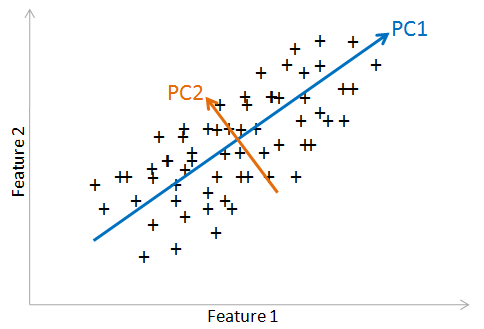

In [2]:
from IPython.display import Image
Image(filename='../Chapter 3 Figures/PCA.png', width=300)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data

### Standardize data

In [4]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

### Eigens Decomposition

In [5]:
# eigendecomposition on covariance matrix

# create covariance matrix
cov_mat = np.cov(X_std.T)

print('Covariance matrix \n%s' %cov_mat)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [6]:
# sort eigenvalues in decreasing order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])    

Eigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


### Plot principal components vs explained variance

Cummulative Variance Explained [  72.77045209   95.80097536   99.48480732  100.        ]


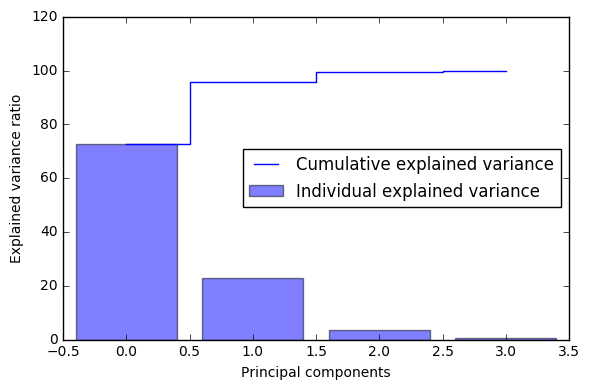

In [7]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print "Cummulative Variance Explained", cum_var_exp

plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### You perform the PCA using sklearn library and plot eigenvalues

In the above plot we can see that first 3 principal components are explaining 99% of the variance.
Let's perform PCA using scikit-learn and plot the 1st 3 eigenvector

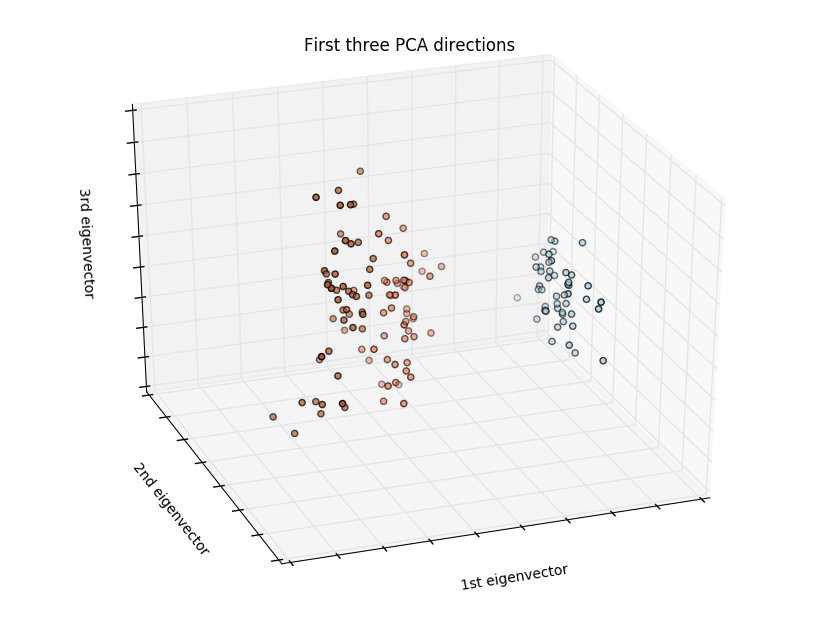

In [8]:
# source: http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
Y = iris.target

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()